Mnist è un dataset di immagini che raffigurano numeri da 0 a 9 per il training di un DL per il riconoscimento dei numeri

 - https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
 - https://towardsdatascience.com/mnist-handwritten-digits-classification-from-scratch-using-python-numpy-b08e401c4dab
 - https://github.com/datapythonista/mnist


In [23]:
# Mninst e' un dataset contenuto nel modulo keras.datasets
# Il dataset e' composto da 60000 immagini di cifre scritte a mano
# Ogni immagine e' composta da 28x28 pixel
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

In [24]:
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# mostriamo il dataset MNIST
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


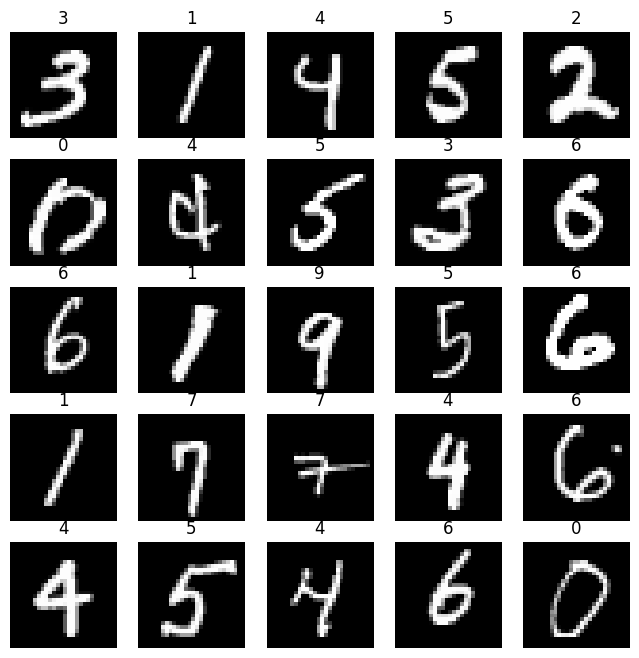

In [25]:
# plottiamo qualche immagine di esempio
import numpy as np
import matplotlib.pyplot as plt

# impostiamo il backgroung di matplotlib
plt.figure(figsize=(8, 8), facecolor='w')

# creiamo un vettore di 25 indici randomici
indexs = np.random.randint(0, train_X.shape[0], size=25)

# selezioniamo le immagini e le etichette corrispondenti
images = train_X[indexs]
labels = train_y[indexs]

# plottiamo le immagini
for i in range(len(indexs)):

    plt.subplot(5, 5, i + 1)             # impostiamo un subplot 5x5
    plt.imshow(images[i],                # plottiamo l'immagine con il metodo imshow
               cmap=plt.get_cmap('gray') # se vogliamo vedere le immagini in scala di grigi
               )
    plt.title(labels[i])                 # impostiamo il titolo di ogni subplot
    plt.axis('off')                      # disabilitiamo gli assi

# mostriamo il plot completo
plt.show()


scriviamo il codice per riconoscere le immagini del dataset mnist

In [26]:
# importiamo le libreire necessarie
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD


Categoriziamo le etichette in 10 classi, una per ogni cifra da 0 a 9. Per fare ciò, convertiamo semplicemente i vettori di classi in matrici di classi binarie:

In [27]:
# ora trasformiamo i label in one hot encoding
# vuol dire che se abbiamo 10 classi, ogni label diventa un vettore di 10 elementi
# one hot encoding: 0 -> [1,0,0,0,0,0,0,0,0,0]
#                   1 -> [0,1,0,0,0,0,0,0,0,0]
#                   2 -> [0,0,1,0,0,0,0,0,0,0]
#                   3 -> [0,0,0,1,0,0,0,0,0,0]
#                   4 -> [0,0,0,0,1,0,0,0,0,0]
#                   5 -> [0,0,0,0,0,1,0,0,0,0]
#                   6 -> [0,0,0,0,0,0,1,0,0,0]
#                   7 -> [0,0,0,0,0,0,0,1,0,0]
#                   8 -> [0,0,0,0,0,0,0,0,1,0]
#                   9 -> [0,0,0,0,0,0,0,0,0,1]
# categorizzare i valori di label
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# normalizziamo i valori dei pixel da 0-255 a 0-1
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

In [28]:
# ora trasformiamo le immagini in tensori ("matrice a più dimensioni")
# https://it.wikipedia.org/wiki/Tensore
# e le normalizziamo
image_size_length = train_X.shape[1]
image_size_width = train_X.shape[2]
input_size = (image_size_length, image_size_width, 1)

Creiamo un modello CNN per riconoscere le immagini di MNIST.
La CNN è composta da 2 layer convoluzionali, 2 layer di max pooling e 2 layer di neuroni densi.

 - https://it.mathworks.com/discovery/convolutional-neural-network-matlab.html

In [29]:
# creiamo il nostro modello
model = Sequential()

# aggiungiamo il primo strato convoluzionale
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_size))
# aggiungiamo il primo strato di pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# aggiungiamo il secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
# aggiungiamo il secondo strato di pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# aggiungiamo lo strato di flatten
model.add(Flatten())
# aggiungiamo lo strato dense
model.add(Dense(128, activation='relu'))
# aggiungiamo lo strato di output
model.add(Dense(10, activation='softmax'))

# compiliamo il modello
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [30]:
# stampiamo un riassunto del modello
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [31]:
# alleniamo il modello
model.fit(train_X, train_y, epochs=5, batch_size=32)

2023-08-23 11:35:40.086103: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1230 - accuracy: 0.9605
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0278 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0204 - accuracy: 0.9937
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0155 - accuracy: 0.9950


In [32]:
# effettuiamo le previsioni di test
predictions = model.predict(test_X)
print(predictions[0])

# ogni elemento di predictions è un array di 10 elementi, che rappresentano le probabilità che l'immagine sia un numero da 0 a 9
# per ogni elemento di predictions, prendiamo l'indice del valore massimo, che corrisponde al numero previsto
predictions = np.argmax(predictions, axis=1)



313/313 [==============================] - 2s 7ms/step
[1.1521167e-08 1.2684620e-07 9.4914398e-08 1.0350137e-06 3.5980531e-08
 1.9855477e-09 3.7297356e-11 9.9999768e-01 1.5051878e-08 9.7994155e-07]


In [33]:
test_y = np.argmax(test_y, axis=1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



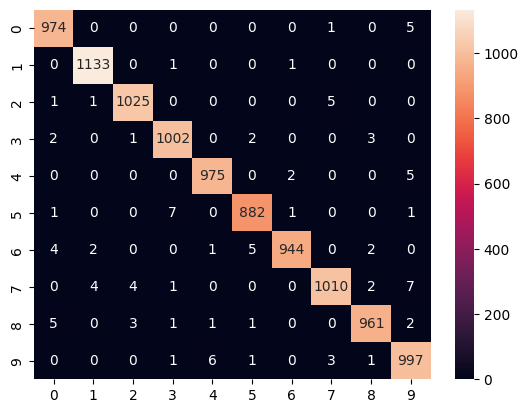

In [34]:
# importiamo le libreire che ci servono per valutare il modello
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# valutiamo il modello
print(classification_report(test_y, predictions))

# creiamo la matrice di confusione
cm = confusion_matrix(test_y, predictions)

# creiamo il grafico della matrice di confusione
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

